David Liu

BAN 693


https://codehandbook.org/how-to-read-email-from-gmail-using-python/

https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

## Preliminary Steps

Setting the authentification info and packages, and checking for available email folders in my gmail

In [755]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime, os, glob
import email, imaplib
import re

In [756]:
import imaplib
mail = imaplib.IMAP4_SSL('imap.gmail.com')
mail.login('david92liu@gmail.com', '********')  # this is not my actual gmail pw. I took it out for security reasons
print(mail.list())

('OK', [b'(\\HasNoChildren) "/" "Drafts"', b'(\\HasNoChildren) "/" "INBOX"', b'(\\HasNoChildren) "/" "Orders"', b'(\\HasNoChildren) "/" "Other"', b'(\\HasNoChildren) "/" "Outbox"', b'(\\HasNoChildren) "/" "Sent"', b'(\\HasNoChildren) "/" "Trash"', b'(\\HasChildren \\Noselect) "/" "[Gmail]"', b'(\\All \\HasNoChildren) "/" "[Gmail]/All Mail"', b'(\\Drafts \\HasNoChildren) "/" "[Gmail]/Drafts"', b'(\\HasNoChildren \\Important) "/" "[Gmail]/Important"', b'(\\HasNoChildren \\Sent) "/" "[Gmail]/Sent Mail"', b'(\\HasNoChildren \\Junk) "/" "[Gmail]/Spam"', b'(\\Flagged \\HasNoChildren) "/" "[Gmail]/Starred"', b'(\\HasNoChildren \\Trash) "/" "[Gmail]/Trash"'])


generates search criterias

In [757]:
cwd = os.getcwd()

EMAIL_UN = 'david92liu@gmail.com'
EMAIL_PW = '********'    # this is not my actual gmail pw. I took it out for security reasons

## Email Extraction, Cleaning, and Transforming
### Data Extraction and First Cleaning

In [758]:
Ignore_email_list = ["Please join Zoom meeting in progress"]

Method for extracting the texts from emails. Only emails that are sent by me will be extracted. Codes below also does some preliminary cleaning: 
- Reply emails contains a copy of the parent email. Codes below will attempt to remove them, althought the process isn't perfect.
- Forwarded emails will also be removed.

In [759]:
def email_extraction():
    body_text = []
    
    un = EMAIL_UN
    pw = EMAIL_PW
    url = 'imap.gmail.com'

    m = imaplib.IMAP4_SSL(url,993)
    m.login(un,pw)
    #m.select("Sent") 
    m.select('"[Gmail]/Sent Mail"')  
    data = m.search(None, 'ALL')
    mail_ids = data[1]

    id_list = mail_ids[0].split()   
    first_email_id = int(id_list[0])
    latest_email_id = int(id_list[-1])

    for i in range(latest_email_id,latest_email_id-500, -1):                
        
        data = m.fetch(str(i), '(RFC822)' )

        for response_part in data:
            arr = response_part[0]
            if isinstance(arr, tuple):
                msg = email.message_from_string(str(arr[1],'utf-8'))
                email_from = msg['from']
                email_subject = msg['subject']
                
                try:
                    if (email_from == "David Liu <david92liu@gmail.com>") and (email_subject not in Ignore_email_list) and (email_subject.startswith("Fwd:") == False):

                        email_content = None

                        if msg.is_multipart():
                            email_content = msg.get_payload()[0].get_payload()      
                        else:
                            email_content = msg.get_payload()

                        if email_subject.startswith("Re:"):
                            email_content = email_content.split("On")[0]
                            body_text.append(email_content)
                        else:
                            body_text.append(email_content)
                except:
                    print("\n\nThe email that had issues was the following: ")
                    print(email_content)
    m.close()
    m.logout()
    
    return body_text

In [760]:
extracted_emails = email_extraction()



The email that had issues was the following: 
[<email.message.Message object at 0x000001C7B00CC978>, <email.message.Message object at 0x000001C7B01745F8>]


The email that had issues was the following: 
[<email.message.Message object at 0x000001C7B0367F98>, <email.message.Message object at 0x000001C7CF5B80B8>]


The email that had issues was the following: 
[<email.message.Message object at 0x000001C7B0174470>, <email.message.Message object at 0x000001C793F84828>]


The email that had issues was the following: 
[<email.message.Message object at 0x000001C7B2AEEC50>, <email.message.Message object at 0x000001C78F064978>]


The email that had issues was the following: 
[<email.message.Message object at 0x000001C795C65518>, <email.message.Message object at 0x000001C7838E7F60>]


The email that had issues was the following: 
[<email.message.Message object at 0x000001C795C657B8>, <email.message.Message object at 0x000001C7838E7F60>]


The email that had issues was the following: 
[<email.me



The email that had issues was the following: 
[<email.message.Message object at 0x000001C7F544B390>, <email.message.Message object at 0x000001C7AD1043C8>]


The email that had issues was the following: 
[<email.message.Message object at 0x000001C7F5450EF0>, <email.message.Message object at 0x000001C7B261C7F0>]


The email that had issues was the following: 
[<email.message.Message object at 0x000001C7F54495F8>, <email.message.Message object at 0x000001C7F4FBA6D8>]


The email that had issues was the following: 
[<email.message.Message object at 0x000001C7F544B668>, <email.message.Message object at 0x000001C7AD0F9240>]


The email that had issues was the following: 
[<email.message.Message object at 0x000001C7F5449908>, <email.message.Message object at 0x000001C789211550>]


In [761]:
print("Number of emails extracted: ")
print(len(extracted_emails))

Number of emails extracted: 
396


Below shows how the extracted email data looks like

In [762]:
extracted_emails

['this is a response\r\n\r\n',
 'Hi David,\r\n\r\nThis is a sample email.\r\n',
 'https://www.walmart.com/ip/Apple-iPad-mini-Wi-Fi-64GB/207104625\r\n\r\nhttps://www.bestbuy.com/site/apple-10-2-inch-ipad-latest-model-with-wi-fi-3=\r\n2gb-space-gray/5199701.p?skuId=3D5199701\r\n\r\nhttps://www.adorama.com/acmyla2lla.html?gclid=3DCj0KCQiAzZL-BRDnARIsAPCJs73=\r\nIvW8I6hSvm04SkA0uSh1H4tsa0sjbo7Q-uuhvrndPUyO2jg-Md6QaAt_5EALw_wcB&utm_sourc=\r\ne=3Dadl-gbase\r\n\r\nOlder Model:\r\nhttps://www.walmart.com/ip/Apple-iPad-4-with-Retina-Display-32GB-Wi-Fi-4th-=\r\nGeneration-in-Black/22288800?wmlspartner=3Dwlpa&selectedSellerId=3D9186&&ad=\r\nid=3D22222222227016434816&wl0=3D&wl1=3Dg&wl2=3Dc&wl3=3D343334214440&wl4=3Dp=\r\nla-486397163036&wl5=3D9032013&wl6=3D&wl7=3D&wl8=3D&wl9=3Dpla&wl10=3D1170193=\r\n45&wl11=3Donline&wl12=3D22288800&veh=3Dsem&gclid=3DCj0KCQiAzZL-BRDnARIsAPCJ=\r\ns71ZBDQi_Vj6RvtNPGp55mVHFKiQ3f0UXexwDyKS6BIc_-X3kOA0wusaAmQ5EALw_wcB\r\n',
 'Hi Han,\r\n\r\n\r\n\r\nThis is just a quick f

Checking the length of words in all extracted emails

In [763]:
word_dic = {}

for email in extracted_emails:
    try:
        split_email = email.split()
        for word in split_email:
            word_length = len(word)
            
            if word_length not in word_dic:
                word_dic[word_length] = 1
            else:
                word_dic[word_length] += 1
    except:
        print("Cannot split email")

Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split email
Cannot split

### Second Cleaning
Below codes check for how many words of certain lengths are in the extracted emails.

In [764]:
for key in sorted(word_dic):
    print(key, word_dic[key])

1 896
2 2374
3 2402
4 2245
5 1367
6 855
7 884
8 721
9 526
10 309
11 216
12 133
13 78
14 45
15 7
16 7
17 6
18 6
19 4
20 8
21 5
22 1
23 2
24 2
27 3
28 2
29 1
31 1
33 1
34 1
40 1
41 1
42 2
47 1
51 1
54 2
55 1
57 1
63 1
64 1
65 1
66 1
68 1
69 1
76 29
81 1
93 1
94 1
95 1
114 1
127 1
140 1
142 1
155 1
159 1
191 2
209 1


Going through the email to remove as many non-words as possible, such as web links and formattings. These non-words are usually long, so the codes below will simply remove strings that are greater than a certain length. Shown above, it would appear that the large majority of words are below 15 characters in length. As such, codes below will remove all words in all emails with lengths of 15 and over. Sequences of words after the removed long word will not be treated as contiguous from the sequence of words before the long word. These sequences of words will be removed from the original email and be treated as a new sequence of words.

In [765]:
def clean_word_sequences(list_of_emails, word_length_cutoff):
    cleaned_emails = []

    for email_texts in list_of_emails:
        try:
            sequence = []
            
            raw_email = email_texts.split()
            
            # removes the copy of the parent email from a reply email.
            # all parent copies starts with ">"
            for word in raw_email:
                if word == ">":
                    if len(sequence) > 0:
                        cleaned_emails.append(sequence)
                        sequence = [] 
                    break
                
                
                if len(word) < word_length_cutoff:
                    if word[len(word)-1:] in ["!","?",".",",",")"]:
                        sequence.append(word[:len(word)-1].lower())
                        sequence.append(word[len(word)-1:])
                    elif word[:1] in ["!","?",".",",","("]:
                        sequence.append(word[1:len(word)].lower())
                        sequence.append(word[:1])
                    else:
                        sequence.append(word.lower())
                else:
                    if len(sequence) > 0:
                        cleaned_emails.append(sequence)
                        sequence = []         
            
            if len(sequence) > 0:
                cleaned_emails.append(sequence)
        except:
            print("Could not be split")   
            
    return cleaned_emails

In [766]:
word_length_cutoff = 15

cleaned_data = clean_word_sequences(extracted_emails, word_length_cutoff)
cleaned_data

Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be split
Could not be

[['this', 'is', 'a', 'response'],
 ['hi', 'david', ',', 'this', 'is', 'a', 'sample', 'email', '.'],
 ['e=3dadl-gbase', 'older', 'model:'],
 ['hi',
  'han',
  ',',
  'this',
  'is',
  'just',
  'a',
  'quick',
  'follow-up',
  'from',
  'yesterday',
  '.',
  'i',
  'would',
  'like',
  'to',
  'thank',
  'you',
  'for',
  'spending',
  'an',
  'extended',
  'period',
  'of',
  'time',
  'interviewing',
  'me',
  ',',
  'and',
  'allowing',
  'me',
  'to',
  'have',
  'a',
  'better',
  'understanding',
  'of',
  'what',
  'the',
  'contract',
  'position',
  'entails',
  '.',
  'i',
  'am',
  'excited',
  'for',
  'the',
  'possibility',
  'of',
  'working',
  'with',
  'the',
  'health',
  'strategic',
  'initiative',
  'team',
  'to',
  'build',
  'data',
  'pipelines',
  'and',
  'machine',
  'learning',
  'functions',
  'for',
  'health',
  'and',
  'wellness',
  'applications',
  '.',
  'looking',
  'forward',
  'to',
  'hearing',
  'back',
  'about',
  'any',
  'updates',
  'on',


## Email Data Reformatting
The data needs to be reformatted in such a way that it can become output for a deep learning model. Codes below will go through all the lists of email words. The algorithm will work in such a way that every sequence of, at most, 5 words will be mapped to the following word as the target. This algorithm will move through each list of words in the entire list of email data and continously form sets of 5 word sequences that maps to the next word as targets.

Firstly, it would be necessary to tokenize the words (change to numbers), because that is the only way a deep learning model can handle the words as data.

Method reformat_data() formats the data into inputs and outputs

In [767]:
input_data = None
target_data = None
max_input_length = 5
max_target_length = 1

In [768]:
def reformat_data(data_list, max_input_len):
    inputs = []
    outputs = []
    
    for email in data_list:
        if len(email) >= 2:
            for i in range(1,len(email)):
                input_sequence = email[max(0,i-max_input_len):i]
                target_word = email[i:i+max_target_length]
                
                if len(input_sequence) < max_input_len:
                    for i in range(max_input_len - len(input_sequence)):
                        input_sequence.append(0)
                
                inputs.append(input_sequence)
                outputs.append(target_word)
                
    return inputs, outputs

enumerate_words() method finds all the unique words in the list of emails, and then assigns indexes to them. The method then returns a dictionary that contains the enumerated words.

In [769]:
def enumerate_words(dataset):
    unique_words = []
    word_dic = {}
    
    for word_set in dataset:
        for word in word_set:
            if word not in unique_words:
                unique_words.append(word)
    
    for i, word in enumerate(unique_words):
        word_dic[word] = i
    
    return word_dic, unique_words

In [770]:
unique_words_list, all_words = enumerate_words(cleaned_data)

Tokenizing the words, and converting each set of words into set of numbers.

In [771]:
def split_tokenize(input_len, data, word_list):
    tokenized_data = []
    inputs = []
    outputs = []
    
    for email_text in data:
        seq = []
        
        for word in email_text:
            seq.append(word_list[word])
        
        tokenized_data.append(seq)
    
    inputs, outputs = reformat_data(tokenized_data, input_len)
    
    return inputs, outputs

In [772]:
input_data, output_data = split_tokenize(max_input_length, cleaned_data, unique_words_list)

In [865]:
unique_words_list,

({'this': 0,
  'is': 1,
  'a': 2,
  'response': 3,
  'hi': 4,
  'david': 5,
  ',': 6,
  'sample': 7,
  'email': 8,
  '.': 9,
  'e=3dadl-gbase': 10,
  'older': 11,
  'model:': 12,
  'han': 13,
  'just': 14,
  'quick': 15,
  'follow-up': 16,
  'from': 17,
  'yesterday': 18,
  'i': 19,
  'would': 20,
  'like': 21,
  'to': 22,
  'thank': 23,
  'you': 24,
  'for': 25,
  'spending': 26,
  'an': 27,
  'extended': 28,
  'period': 29,
  'of': 30,
  'time': 31,
  'interviewing': 32,
  'me': 33,
  'and': 34,
  'allowing': 35,
  'have': 36,
  'better': 37,
  'understanding': 38,
  'what': 39,
  'the': 40,
  'contract': 41,
  'position': 42,
  'entails': 43,
  'am': 44,
  'excited': 45,
  'possibility': 46,
  'working': 47,
  'with': 48,
  'health': 49,
  'strategic': 50,
  'initiative': 51,
  'team': 52,
  'build': 53,
  'data': 54,
  'pipelines': 55,
  'machine': 56,
  'learning': 57,
  'functions': 58,
  'wellness': 59,
  'applications': 60,
  'looking': 61,
  'forward': 62,
  'hearing': 63,
  '

Reformatting the shape of the input data to (length of data inputs, max input length, 1), and then normalizing the integers to be between 0 and 1

Reformatting the output data into dummy variables.

In [773]:
from tensorflow.keras.utils import to_categorical

reformatted_input_data = np.reshape(input_data, (len(input_data), max_input_length, 1))
reformatted_input_data = reformatted_input_data / float(len(unique_words_list))
print(reformatted_input_data.shape)

reformatted_output_data = to_categorical(output_data)
print(reformatted_output_data.shape)

(13297, 5, 1)
(13297, 1986)


In [868]:
reformatted_input_data

array([[[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [5.03524673e-04],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [5.03524673e-04],
        [1.00704935e-03],
        [0.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[9.41591138e-02],
        [7.25075529e-02],
        [1.94864048e-01],
        [9.01309164e-02],
        [6.41993958e-01]],

       [[7.25075529e-02],
        [1.94864048e-01],
        [9.01309164e-02],
        [6.41993958e-01],
        [9.11379658e-02]],

       [[1.94864048e-01],
        [9.01309164e-02],
        [6.41993958e-01],
        [9.11379658e-02],
        [4.53172205e-03]]])

## LSTM Models

Building the model. The LSTM_model() function runs an LSTM model.
- batch size is 64
- will be run with 100 and 200 epochs

In [774]:
def LSTM_model(batch_size, ep, model_name, history_name):
    dimension_size = 256
    
    model = Sequential()
    model.add(LSTM(dimension_size, input_shape=(reformatted_input_data.shape[1], reformatted_input_data.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(reformatted_output_data.shape[1], activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    print(model.summary())
    
    gen_model_history = model.fit(reformatted_input_data, reformatted_output_data, epochs=ep, batch_size=batch_size)
    
    # saving the model
    model.save(model_name)
    # saving the loss history of the model
    pd.DataFrame(gen_model_history.history).to_csv(history_name)
    
    return model, gen_model_history

Building the second model. The LSTM_model_2() function runs an LSTM model. Unlike the first model, this model has two LSTM layers
- batch size is 64
- will be run with 100 and 200 epochs

In [775]:
def LSTM_model_2(batch_size, ep, model_name, history_name):
    dimension_size = 256
    
    model = Sequential()
    model.add(LSTM(dimension_size, return_sequences=True, input_shape=(reformatted_input_data.shape[1], reformatted_input_data.shape[2])))
    model.add(LSTM(dimension_size))
    model.add(Dropout(0.2))
    model.add(Dense(reformatted_output_data.shape[1], activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    print(model.summary())
    
    gen_model_history = model.fit(reformatted_input_data, reformatted_output_data, epochs=ep, batch_size=batch_size)
    
    # saving the model
    model.save(model_name)
    # saving the loss history of the model
    pd.DataFrame(gen_model_history.history).to_csv(history_name)
    
    return model, gen_model_history

## Running LSTM_model()
### Batch Size 64, Epochs 100

In [811]:
# batch size and epochs. Adjust these numbers to fit the specifications for the model
# batch_size was 64 for all four models below
# epochs of 100 and 200 were used for LSTM_model
# epochs of 100 and 200 were used for LSTM_model_2
batch_size = 64
epochs = 200

In [812]:
def return_model(ep, bs):
    # specifying the name of the model and model history csv
    model_name = "text_gen_" + str(ep) +".h5"
    model_history_name = "text_gen_history_" + str(ep) +".csv"
    text_gen_model = None
    text_gen_model_history = pd.DataFrame()

    if os.path.exists(model_name):
        print("Model Found: Loading...")
        text_gen_model = load_model(model_name)
        text_gen_model_history = pd.read_csv(model_history_name)
        print(text_gen_model.summary())
        print("Model Loaded!")
    else:
        print("Model not Found. Fitting model...")
        text_gen_model, text_gen_model_history = LSTM_model(bs, ep, model_name, model_history_name)
        text_gen_model_history = text_gen_model_history.history
        
    return text_gen_model, text_gen_model_history

In [813]:
gen_model_1, gen_model_history_1 = return_model(epochs, batch_size)

Model Found: Loading...
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 256)               264192    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1986)              510402    
Total params: 774,594
Trainable params: 774,594
Non-trainable params: 0
_________________________________________________________________
None
Model Loaded!


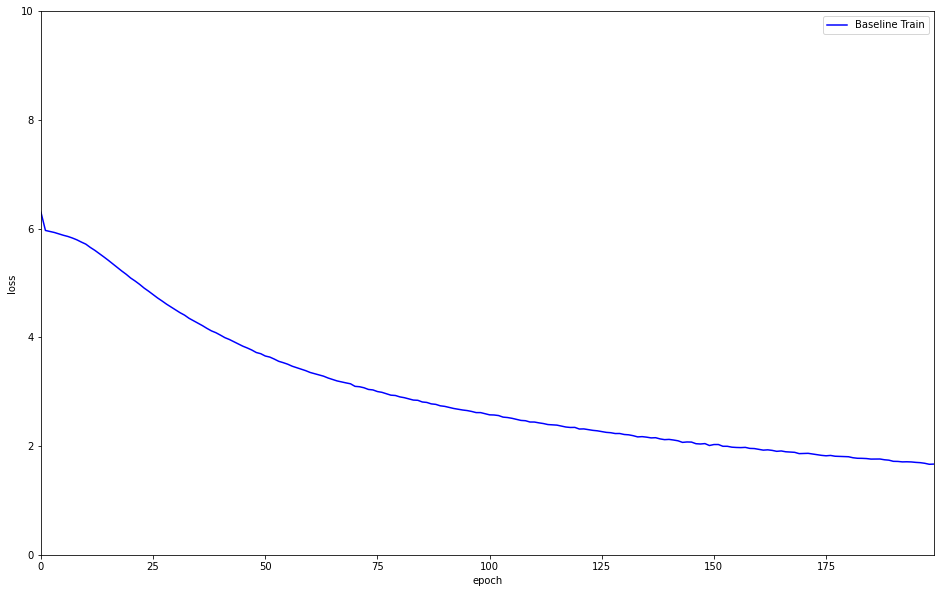

In [814]:
plt.figure(figsize=(16,10))
plt.plot(np.arange(0,epochs,1), gen_model_history_1['loss'], color='blue', label='Baseline Train')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.xlim([0,max(np.arange(0,epochs,1))])
plt.ylim([0,10])
plt.legend()
plt.show()

### Batch Size 64, Epochs 200

In [815]:
# batch size and epochs. Adjust these numbers to fit the specifications for the model
# batch_size was 64 for all four models below
# epochs of 100 and 200 were used for LSTM_model
# epochs of 100 and 200 were used for LSTM_model_2
batch_size = 64
epochs = 500

In [816]:
gen_model_2, gen_model_history_2 = return_model(epochs, batch_size)

Model not Found. Fitting model...
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 256)               264192    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1986)              510402    
Total params: 774,594
Trainable params: 774,594
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
208/208 [==============================] - 3s 14ms/step - loss: 6.3045
Epoch 2/500
208/208 [==============================] - 3s 14ms/step - loss: 5.9630
Epoch 3/500
208/208 [==============================] - 3s 14ms/step - loss: 5.9464
Epoch 4/500
208/208 [==============================] - 3s 14ms/step - loss: 5.9289
Epoch 

208/208 [==============================] - 3s 14ms/step - loss: 2.8048
Epoch 90/500
208/208 [==============================] - 3s 14ms/step - loss: 2.7816
Epoch 91/500
208/208 [==============================] - 3s 14ms/step - loss: 2.7686
Epoch 92/500
208/208 [==============================] - 3s 14ms/step - loss: 2.7650
Epoch 93/500
208/208 [==============================] - 3s 14ms/step - loss: 2.7403
Epoch 94/500
208/208 [==============================] - 3s 14ms/step - loss: 2.7330
Epoch 95/500
208/208 [==============================] - 3s 14ms/step - loss: 2.6935
Epoch 96/500
208/208 [==============================] - 3s 14ms/step - loss: 2.6946
Epoch 97/500
208/208 [==============================] - 3s 14ms/step - loss: 2.6889
Epoch 98/500
208/208 [==============================] - 3s 14ms/step - loss: 2.6548
Epoch 99/500
208/208 [==============================] - 3s 14ms/step - loss: 2.6489
Epoch 100/500
208/208 [==============================] - 3s 14ms/step - loss: 2.6410
Epoc

208/208 [==============================] - 3s 14ms/step - loss: 1.8055
Epoch 186/500
208/208 [==============================] - 3s 14ms/step - loss: 1.8023
Epoch 187/500
208/208 [==============================] - 3s 14ms/step - loss: 1.8239
Epoch 188/500
208/208 [==============================] - 3s 14ms/step - loss: 1.7976
Epoch 189/500
208/208 [==============================] - 3s 14ms/step - loss: 1.7959
Epoch 190/500
208/208 [==============================] - 3s 14ms/step - loss: 1.7894
Epoch 191/500
208/208 [==============================] - 3s 14ms/step - loss: 1.8007
Epoch 192/500
208/208 [==============================] - 3s 14ms/step - loss: 1.7767
Epoch 193/500
208/208 [==============================] - 3s 14ms/step - loss: 1.7688
Epoch 194/500
208/208 [==============================] - 3s 14ms/step - loss: 1.7662
Epoch 195/500
208/208 [==============================] - 3s 14ms/step - loss: 1.7559
Epoch 196/500
208/208 [==============================] - 3s 14ms/step - loss: 1

208/208 [==============================] - 3s 14ms/step - loss: 1.3387
Epoch 282/500
208/208 [==============================] - 3s 15ms/step - loss: 1.3367
Epoch 283/500
208/208 [==============================] - 3s 14ms/step - loss: 1.3328
Epoch 284/500
208/208 [==============================] - 3s 14ms/step - loss: 1.3371
Epoch 285/500
208/208 [==============================] - 3s 14ms/step - loss: 1.3103
Epoch 286/500
208/208 [==============================] - 3s 14ms/step - loss: 1.3247
Epoch 287/500
208/208 [==============================] - 3s 14ms/step - loss: 1.3385: 0s - loss: 1.323 - ETA: 0s - 
Epoch 288/500
208/208 [==============================] - 3s 14ms/step - loss: 1.3103
Epoch 289/500
208/208 [==============================] - 3s 14ms/step - loss: 1.3162
Epoch 290/500
208/208 [==============================] - 3s 14ms/step - loss: 1.3152
Epoch 291/500
208/208 [==============================] - 3s 14ms/step - loss: 1.3206
Epoch 292/500
208/208 [=========================

Epoch 377/500
208/208 [==============================] - 3s 14ms/step - loss: 1.0683
Epoch 378/500
208/208 [==============================] - 3s 14ms/step - loss: 1.0690
Epoch 379/500
208/208 [==============================] - 3s 14ms/step - loss: 1.0679
Epoch 380/500
208/208 [==============================] - 3s 14ms/step - loss: 1.0579
Epoch 381/500
208/208 [==============================] - 3s 14ms/step - loss: 1.0422
Epoch 382/500
208/208 [==============================] - 3s 14ms/step - loss: 1.0581
Epoch 383/500
208/208 [==============================] - 3s 14ms/step - loss: 1.0616
Epoch 384/500
208/208 [==============================] - 3s 14ms/step - loss: 1.0485
Epoch 385/500
208/208 [==============================] - 3s 14ms/step - loss: 1.0431
Epoch 386/500
208/208 [==============================] - 3s 14ms/step - loss: 1.0350
Epoch 387/500
208/208 [==============================] - 3s 14ms/step - loss: 1.0217
Epoch 388/500
208/208 [==============================] - 3s 14ms/

208/208 [==============================] - 3s 14ms/step - loss: 0.8790
Epoch 474/500
208/208 [==============================] - 3s 14ms/step - loss: 0.8857
Epoch 475/500
208/208 [==============================] - 3s 14ms/step - loss: 0.8892
Epoch 476/500
208/208 [==============================] - 3s 14ms/step - loss: 0.8935
Epoch 477/500
208/208 [==============================] - 3s 14ms/step - loss: 0.8772
Epoch 478/500
208/208 [==============================] - 3s 14ms/step - loss: 0.8705
Epoch 479/500
208/208 [==============================] - 3s 14ms/step - loss: 0.8724
Epoch 480/500
208/208 [==============================] - 3s 14ms/step - loss: 0.8768
Epoch 481/500
208/208 [==============================] - 3s 14ms/step - loss: 0.8731
Epoch 482/500
208/208 [==============================] - 3s 14ms/step - loss: 0.8603
Epoch 483/500
208/208 [==============================] - 3s 14ms/step - loss: 0.8747
Epoch 484/500
208/208 [==============================] - 3s 14ms/step - loss: 0

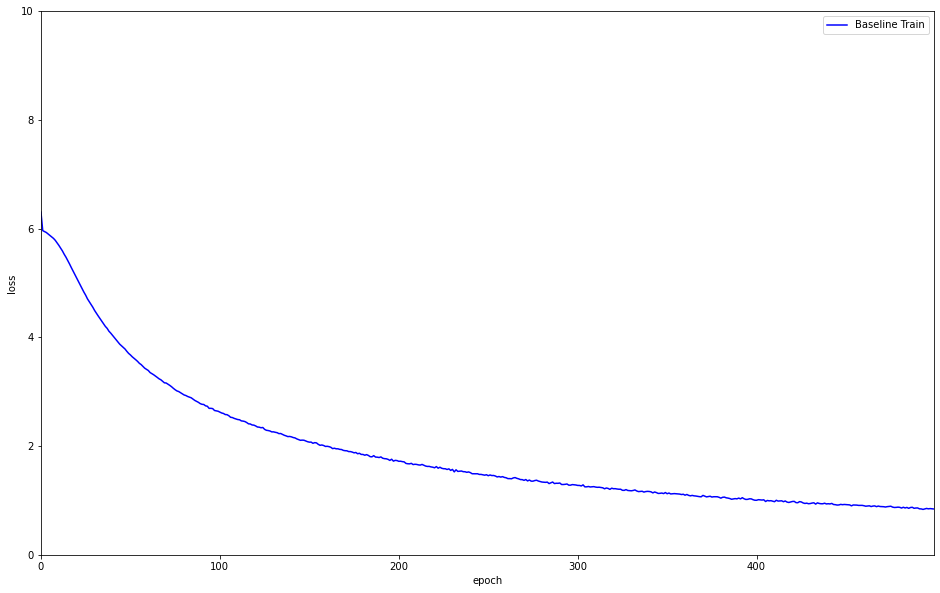

In [817]:
plt.figure(figsize=(16,10))
plt.plot(np.arange(0,epochs,1), gen_model_history_2['loss'], color='blue', label='Baseline Train')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.xlim([0,max(np.arange(0,epochs,1))])
plt.ylim([0,10])
plt.legend()
plt.show()

## Running LSTM_model_2()
### Batch Size 64, Epochs 100

In [818]:
# batch size and epochs. Adjust these numbers to fit the specifications for the model
# batch_size was 64 for all four models below
# epochs of 100 and 200 were used for LSTM_model
# epochs of 100 and 200 were used for LSTM_model_2
batch_size = 64
epochs = 200

In [819]:
def return_model_2(ep, bs):
    # specifying the name of the model and model history csv
    model_name = "text_gen_" + str(ep) +"_2.h5"
    model_history_name = "text_gen_history_" + str(ep) +"_2.csv"
    text_gen_model = None
    text_gen_model_history = pd.DataFrame()

    if os.path.exists(model_name):
        print("Model Found: Loading...")
        text_gen_model = load_model(model_name)
        text_gen_model_history = pd.read_csv(model_history_name)
        print(text_gen_model.summary())
        print("Model Loaded!")
    else:
        print("Model not Found. Fitting model...")
        text_gen_model, text_gen_model_history = LSTM_model_2(bs, ep, model_name, model_history_name)
        text_gen_model_history = text_gen_model_history.history
        
    return text_gen_model, text_gen_model_history

In [820]:
gen_model_3, gen_model_history_3 = return_model_2(epochs, batch_size)

Model Found: Loading...
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
lstm_24 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1986)              510402    
Total params: 1,299,906
Trainable params: 1,299,906
Non-trainable params: 0
_________________________________________________________________
None
Model Loaded!


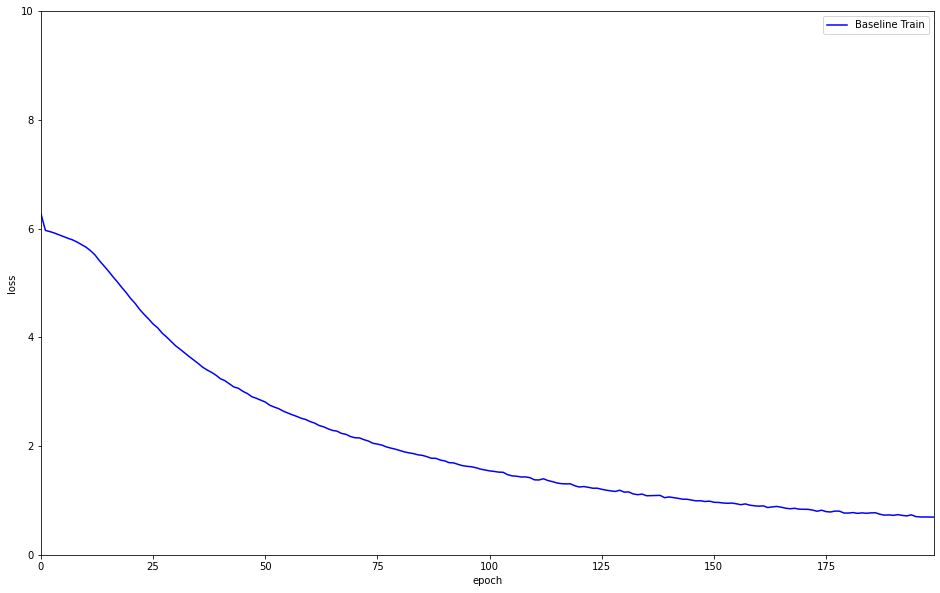

In [821]:
plt.figure(figsize=(16,10))
plt.plot(np.arange(0,epochs,1), gen_model_history_3['loss'], color='blue', label='Baseline Train')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.xlim([0,max(np.arange(0,epochs,1))])
plt.ylim([0,10])
plt.legend()
plt.show()

### Batch Size 64, Epochs 200

In [822]:
# batch size and epochs. Adjust these numbers to fit the specifications for the model
# batch_size was 64 for all four models below
# epochs of 100 and 200 were used for LSTM_model
# epochs of 100 and 200 were used for LSTM_model_2
batch_size = 64
epochs = 500

In [823]:
gen_model_4, gen_model_history_4 = return_model_2(epochs, batch_size)

Model not Found. Fitting model...
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
lstm_27 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1986)              510402    
Total params: 1,299,906
Trainable params: 1,299,906
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
208/208 [==============================] - 6s 27ms/step - loss: 6.2591
Epoch 2/500
208/208 [==============================] - 6s 27ms/step - loss: 5.9700
Epoch 3/500
208/208 [===============

208/208 [==============================] - 6s 26ms/step - loss: 1.6800
Epoch 88/500
208/208 [==============================] - 5s 26ms/step - loss: 1.6537
Epoch 89/500
208/208 [==============================] - 5s 26ms/step - loss: 1.6329
Epoch 90/500
208/208 [==============================] - 5s 26ms/step - loss: 1.6091
Epoch 91/500
208/208 [==============================] - 5s 26ms/step - loss: 1.5999
Epoch 92/500
208/208 [==============================] - 5s 26ms/step - loss: 1.5786
Epoch 93/500
208/208 [==============================] - 6s 27ms/step - loss: 1.5475
Epoch 94/500
208/208 [==============================] - 5s 26ms/step - loss: 1.5317
Epoch 95/500
208/208 [==============================] - 5s 26ms/step - loss: 1.5177
Epoch 96/500
208/208 [==============================] - 5s 26ms/step - loss: 1.4878
Epoch 97/500
208/208 [==============================] - 5s 26ms/step - loss: 1.5023
Epoch 98/500
208/208 [==============================] - 5s 26ms/step - loss: 1.4828
Epoch

208/208 [==============================] - 5s 26ms/step - loss: 0.7282
Epoch 184/500
208/208 [==============================] - 5s 26ms/step - loss: 0.6983
Epoch 185/500
208/208 [==============================] - 5s 26ms/step - loss: 0.6966
Epoch 186/500
208/208 [==============================] - 6s 27ms/step - loss: 0.6914
Epoch 187/500
208/208 [==============================] - 5s 26ms/step - loss: 0.6869
Epoch 188/500
208/208 [==============================] - 6s 27ms/step - loss: 0.6978: 0s
Epoch 189/500
208/208 [==============================] - 6s 27ms/step - loss: 0.6946
Epoch 190/500
208/208 [==============================] - 5s 26ms/step - loss: 0.6719
Epoch 191/500
208/208 [==============================] - 5s 26ms/step - loss: 0.6662
Epoch 192/500
208/208 [==============================] - 5s 26ms/step - loss: 0.6686
Epoch 193/500
208/208 [==============================] - 5s 26ms/step - loss: 0.6935
Epoch 194/500
208/208 [==============================] - 5s 26ms/step - los

208/208 [==============================] - 5s 26ms/step - loss: 0.4701
Epoch 280/500
208/208 [==============================] - 5s 26ms/step - loss: 0.4822
Epoch 281/500
208/208 [==============================] - 5s 26ms/step - loss: 0.4698
Epoch 282/500
208/208 [==============================] - 6s 27ms/step - loss: 0.4706
Epoch 283/500
208/208 [==============================] - 5s 26ms/step - loss: 0.4873
Epoch 284/500
208/208 [==============================] - 6s 27ms/step - loss: 0.4582
Epoch 285/500
208/208 [==============================] - 5s 26ms/step - loss: 0.4677
Epoch 286/500
208/208 [==============================] - 5s 26ms/step - loss: 0.4741
Epoch 287/500
208/208 [==============================] - 5s 26ms/step - loss: 0.4787
Epoch 288/500
208/208 [==============================] - 5s 26ms/step - loss: 0.4609
Epoch 289/500
208/208 [==============================] - 5s 26ms/step - loss: 0.4761
Epoch 290/500
208/208 [==============================] - 5s 26ms/step - loss: 0

208/208 [==============================] - 5s 26ms/step - loss: 0.3789
Epoch 376/500
208/208 [==============================] - 5s 26ms/step - loss: 0.3935
Epoch 377/500
208/208 [==============================] - 5s 26ms/step - loss: 0.3940
Epoch 378/500
208/208 [==============================] - 5s 26ms/step - loss: 0.3793
Epoch 379/500
208/208 [==============================] - 6s 27ms/step - loss: 0.3858
Epoch 380/500
208/208 [==============================] - 6s 27ms/step - loss: 0.3831
Epoch 381/500
208/208 [==============================] - 5s 26ms/step - loss: 0.3954
Epoch 382/500
208/208 [==============================] - 5s 26ms/step - loss: 0.3785
Epoch 383/500
208/208 [==============================] - 5s 26ms/step - loss: 0.3794
Epoch 384/500
208/208 [==============================] - 5s 26ms/step - loss: 0.3776
Epoch 385/500
208/208 [==============================] - 5s 26ms/step - loss: 0.3957
Epoch 386/500
208/208 [==============================] - 5s 26ms/step - loss: 0

208/208 [==============================] - 5s 26ms/step - loss: 0.3345
Epoch 472/500
208/208 [==============================] - 5s 26ms/step - loss: 0.3210
Epoch 473/500
208/208 [==============================] - 5s 26ms/step - loss: 0.3409
Epoch 474/500
208/208 [==============================] - 6s 27ms/step - loss: 0.3481: 0s - loss: 0.3
Epoch 475/500
208/208 [==============================] - 6s 27ms/step - loss: 0.3490
Epoch 476/500
208/208 [==============================] - 6s 27ms/step - loss: 0.3490
Epoch 477/500
208/208 [==============================] - 6s 27ms/step - loss: 0.3341
Epoch 478/500
208/208 [==============================] - 5s 26ms/step - loss: 0.3407
Epoch 479/500
208/208 [==============================] - 6s 27ms/step - loss: 0.3274
Epoch 480/500
208/208 [==============================] - 5s 26ms/step - loss: 0.3262
Epoch 481/500
208/208 [==============================] - 5s 26ms/step - loss: 0.3323
Epoch 482/500
208/208 [==============================] - 5s 26m

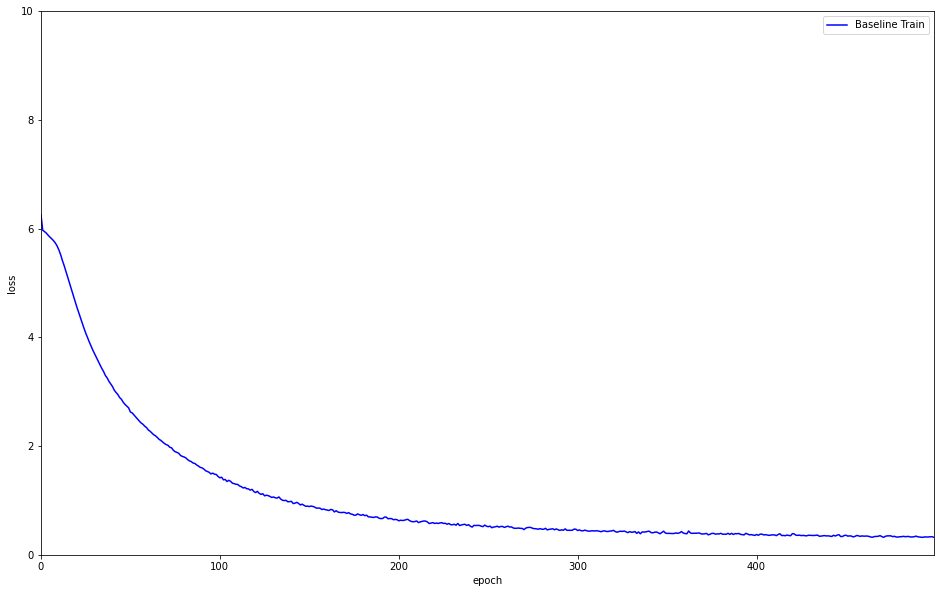

In [824]:
plt.figure(figsize=(16,10))
plt.plot(np.arange(0,epochs,1), gen_model_history_4['loss'], color='blue', label='Baseline Train')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.xlim([0,max(np.arange(0,epochs,1))])
plt.ylim([0,10])
plt.legend()
plt.show()

## Inference
### Accuracy Test

Inserting all input data back into each model to see how well each model generate words.

In [825]:
model_1_pred = gen_model_1.predict(reformatted_input_data)
model_2_pred = gen_model_2.predict(reformatted_input_data)
model_3_pred = gen_model_3.predict(reformatted_input_data)
model_4_pred = gen_model_4.predict(reformatted_input_data)

In [826]:
def untokenize_output_data(output_data, all_words):
    untokenized_words = []
    
    for word_int in output_data:
        untokenized_words.append(all_words[word_int[0]])
        
    return untokenized_words

In [827]:
def predicted_word(predictions, all_words): 
    word_predictions = []
    
    for pred in predictions:
        max_value_index = np.argmax(pred)
        best_word = all_words[max_value_index]
        word_predictions.append(best_word)
    
    return word_predictions

In [828]:
def accuracy(list_1, list_2):
    matches = 0
    
    for i in range(len(list_1)):
        if list_1[i] == list_2[i]:
            matches += 1
    
    return matches/len(list_1)        

Untokenizing all the predictions from each of the 4 models

In [829]:
untokenized_predictions_model_1 = predicted_word(model_1_pred, all_words)
untokenized_predictions_model_2 = predicted_word(model_2_pred, all_words)
untokenized_predictions_model_3 = predicted_word(model_3_pred, all_words)
untokenized_predictions_model_4 = predicted_word(model_4_pred, all_words)

In [830]:
untokened_outputs = untokenize_output_data(output_data, all_words)

Testing the accuracy of each model. Original inputs are reinserted into each model to predict words. These words are then compared with the original outputs to see how well they match

In [831]:
model_1_accuracy = accuracy(untokenized_predictions_model_1,untokened_outputs)
model_2_accuracy = accuracy(untokenized_predictions_model_2,untokened_outputs)
model_3_accuracy = accuracy(untokenized_predictions_model_3,untokened_outputs)
model_4_accuracy = accuracy(untokenized_predictions_model_4,untokened_outputs)

In [832]:
print("model 1 accuracy: ", model_1_accuracy)
print("model 2 accuracy: ", model_2_accuracy)
print("model 3 accuracy: ", model_3_accuracy)
print("model 4 accuracy: ", model_4_accuracy)

model 1 accuracy:  0.7041437918327442
model 2 accuracy:  0.8877942393020982
model 3 accuracy:  0.9134391216063774
model 4 accuracy:  0.9414153568474092


### Benchmark Model

In [854]:
output_word_dic = {}

for each in untokened_outputs:
    if each not in output_word_dic:
        output_word_dic[each] = 1
    else:
        output_word_dic[each] += 1
   

Finding the most commonly occuring word in the output dataset

In [855]:
max_key = 0
max_count = 0  

for i in output_word_dic: 
    key = i 
    count = output_word_dic[i]
    
    if count > max_count:
        max_count = count
        max_key = key

In [862]:
print("Most counted output is:", max_key, "with count of:" , max_count, " ||  total number of output values is:", len(untokened_outputs))
print("Naive chance of correct guesses: ", max_count/len(untokened_outputs))

Most counted output is: . with count of: 631  ||  total number of output values is: 13297
Naive chance of correct guesses:  0.04745431300293299


### Subjective Text Generation Test

In [833]:
def tokenize(list_of_words, unique_words_list):
    new_list = []
    
    try:
        for each in list_of_words:
            new_list.append(unique_words_list[each.lower()])
            
        return new_list
    except:
        return []

Below function word_generation_test() will continously generate new words corresponding to the number of iterations specified.

In [834]:
def word_generation_test(model, starting_words, iterations, input_length):
    list_of_words = starting_words.copy()    
    
    for it in range(iterations):
        
        if len(list_of_words) < input_length:    
            temp_list_of_words = list_of_words.copy()

            for i in range(input_length - len(list_of_words)):
                temp_list_of_words.append(0)
            
            reformat_input = np.reshape(temp_list_of_words, (1, input_length, 1))
            reformat_input = reformat_input / float(len(unique_words_list))
            
            prediction = model.predict(reformat_input)
            word_int = np.argmax(prediction[0])
            
            list_of_words.append(word_int)
        else:
            temp_list_of_words = list_of_words[len(list_of_words)-5:len(list_of_words)]
            
            reformat_input = np.reshape(temp_list_of_words, (1, input_length, 1))
            reformat_input = reformat_input / float(len(unique_words_list))
            
            prediction = model.predict(reformat_input)
            word_int = np.argmax(prediction[0])
            
            list_of_words.append(word_int)
            
    return list_of_words

In [835]:
def decipher_tokens(word_list, all_words):
    string = ""
    
    for index in word_list:
        string = string + all_words[index] + " "
        
    return string

In [836]:
iterations = 100
input_length = 5
starting_words = ["hello", "david"]
starting_words_token = tokenize(starting_words, unique_words_list)

word_list_1 = word_generation_test(gen_model_1, starting_words_token, iterations, input_length)
word_list_2 = word_generation_test(gen_model_2, starting_words_token, iterations, input_length)
word_list_3 = word_generation_test(gen_model_3, starting_words_token, iterations, input_length)
word_list_4 = word_generation_test(gen_model_4, starting_words_token, iterations, input_length)

In [837]:
print(decipher_tokens(word_list_1, all_words))

hello david mike week several our in left . i would snake guy of number , . former . of and realized that i . quickly adapt on and course , time am , following company whether , i . for to do to for thanks love . dr . madasamy . charles will be small pm . plaxgen fremont . typically sales found genentech's work culture and the would like i contract like , questions of know call . i me regards taking your a while we'll . here's hoping python . the i got asks of i csueb , data 


In [838]:
print(decipher_tokens(word_list_2, all_words))

hello david we arranged speak speak a the . probably you ask . david am love to , sn rubbed or and i just be do if today opportunities far will the apply , either is news you had that i david interview me last , pretty 12 my my contacted , i lot that this a interview me chance a pretty unusual for apple standards ? regards , david liu wed 510-219-5580 . threads that recommended be #2 , five , the #5 . the sn with the sn rubbed , $12/hr . read to the already . as that i 


In [839]:
print(decipher_tokens(word_list_3, all_words))

hello david mike see several and the so very case this the shoot up and would enthusiastic two on were only program on site , i page . and interview me the interview tools . granted that summer project . the am david to i be someone who would need to be mentored and grow in the position , so i am guessing he is not hiring me for my expertise . i assume that this sort of interview is pretty unusual for apple standards ? regards , david liu apologies wed statistics and the estimate , the only include the front 


In [840]:
print(decipher_tokens(word_list_4, all_words))

hello david would it be possible if i get a reestimate for the project if we exclude scaffolding on the back side of the building , and only include the front and and the two adjacent sides ? also , would you happen to know how long does this usually take ? thanks , david liu got you the you david have a david along on making . goal for my short for this am planning i weekend a . . am birthday email i sn rubbed off , or bates immediately next in santa in on of for are apologies on 


## Demo

In [873]:
import tkinter as tk
from tkinter import *

iterations = 1
input_length = 5
gen_model = gen_model_4

root = tk.Tk()
# **********************************************************************
def generate_text():
    text = text1.get("1.0","end-1c")
    Text = text.split()
    
    sequence = []
    
    for word in Text:
        if word[len(word)-1:] in ["!","?",".",",",")"]:
            sequence.append(word[:len(word)-1].lower())
            sequence.append(word[len(word)-1:])
        elif word[:1] in ["!","?",".",",","("]:
            sequence.append(word[1:len(word)].lower())
            sequence.append(word[:1])
        else:
            sequence.append(word.lower())
    
    tokenized_sequence = tokenize(sequence, unique_words_list)
    
    gen_word = word_generation_test(gen_model, tokenized_sequence, iterations, input_length)
    
    deciphered_word = decipher_tokens(gen_word[len(gen_word) - 1:], all_words)
    
    text1.insert(tk.END, deciphered_word)

    
# **********************************************************************
text1 = tk.Text(root, height=20, width=50)
scroll = tk.Scrollbar(root, command=text2.yview)
text1.configure(yscrollcommand=scroll.set)
Take_text=Button(root, height=1, width=10, text="Generate", 
                    command=lambda: generate_text())
Take_text.pack()
text1.pack(side=tk.LEFT)
scroll.pack(side=tk.RIGHT, fill=tk.Y)

root.mainloop()